In [177]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np

In [178]:
df = pd.read_csv('/Users/ksenyanix/Glioma-Grading-Classification/TCGA_GBM_LGG_Mutations_all.csv')
df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


# Data preprocessing

In [179]:
for i in df.columns:
    print(df[i].unique())

['LGG' 'GBM']
['TCGA-LGG' 'TCGA-GBM']
['TCGA-DU-8164' 'TCGA-QH-A6CY' 'TCGA-HW-A5KM' 'TCGA-E1-A7YE'
 'TCGA-S9-A6WG' 'TCGA-DB-A4X9' 'TCGA-P5-A5F4' 'TCGA-FG-A4MY'
 'TCGA-HT-A5R5' 'TCGA-DU-A76K' 'TCGA-QH-A6CV' 'TCGA-FG-5962'
 'TCGA-DU-6402' 'TCGA-DB-A75M' 'TCGA-DB-A4XG' 'TCGA-DU-5851'
 'TCGA-DB-A4XH' 'TCGA-HT-7874' 'TCGA-DH-A66D' 'TCGA-DU-5871'
 'TCGA-FG-A60J' 'TCGA-E1-A7Z3' 'TCGA-DU-7011' 'TCGA-VW-A8FI'
 'TCGA-DU-A7TB' 'TCGA-HT-7856' 'TCGA-TQ-A7RU' 'TCGA-HW-7486'
 'TCGA-DU-6399' 'TCGA-DU-A7TA' 'TCGA-HT-A5RA' 'TCGA-DB-5280'
 'TCGA-DU-6405' 'TCGA-S9-A7J1' 'TCGA-S9-A7J2' 'TCGA-HW-7495'
 'TCGA-FG-A710' 'TCGA-P5-A5ET' 'TCGA-DU-7300' 'TCGA-DU-A5TY'
 'TCGA-VM-A8CH' 'TCGA-R8-A6YH' 'TCGA-S9-A6WE' 'TCGA-HT-7681'
 'TCGA-KT-A7W1' 'TCGA-FG-5964' 'TCGA-S9-A6TX' 'TCGA-P5-A5F2'
 'TCGA-DU-5874' 'TCGA-DU-A5TT' 'TCGA-CS-5396' 'TCGA-DU-7302'
 'TCGA-S9-A6TW' 'TCGA-RY-A845' 'TCGA-HT-A61A' 'TCGA-DU-7018'
 'TCGA-HW-7489' 'TCGA-R8-A6ML' 'TCGA-DH-5144' 'TCGA-DU-7013'
 'TCGA-CS-4941' 'TCGA-WY-A85E' 'TCGA-DH-A7UR' '

In [180]:
df.replace({'MUTATED': 1, 'NOT_MUTATED': 0, 'Female': 1, 'Male': 0, 'LGG': 0, 'GBM': 1}, inplace=True)

In [181]:
df = df[df['Gender'] != '--']
df.drop(columns=(['Case_ID', 'Project', 'Primary_Diagnosis']), inplace=True)

/var/folders/cj/5yw5vpbx3w793bdrt43m_7zm0000gn/T/ipykernel_37199/2656512999.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
df = df[df['Race'] != 'not reported']
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51 years 108 days,white,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38 years 261 days,white,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35 years 62 days,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32 years 283 days,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31 years 187 days,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77 years 325 days,white,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
858,1,0,85 years 65 days,white,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
859,1,1,77 years 178 days,white,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1,0,63 years 121 days,white,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [183]:
df = pd.concat([df, pd.get_dummies(df['Race'], prefix='Race')], axis=1)

In [184]:
df.drop(columns=['Race'], inplace=True)
df

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51 years 108 days,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38 years 261 days,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35 years 62 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32 years 283 days,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31 years 187 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77 years 325 days,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85 years 65 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77 years 178 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63 years 121 days,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [185]:
data = []
years = pd.DataFrame(data)

In [186]:
years = df['Age_at_diagnosis'].str.split(' ', expand=True)
years.drop(columns=[1, 3], inplace=True)
years[2] = pd.to_numeric(years[2], errors='coerce')
years[0] = pd.to_numeric(years[0], errors='coerce')
years[2] = round(years[2] / 365, 2)
years[0] = years[0] + years[2]
df['Age_at_diagnosis'] = years[0]
df

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51.30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38.72,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35.17,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32.78,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31.51,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77.89,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85.18,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77.49,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63.33,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [187]:
df.describe()

,Grade,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
count,840.00,837.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,...,840.00,840.00,840.00,840.00,840.00,840.00,8.40e+02,840.00,840.00,840.00
mean,0.42,50.87,0.48,0.41,0.26,0.17,0.13,0.13,0.12,0.09,...,0.03,0.03,0.03,0.03,0.03,0.03,1.19e-03,0.02,0.07,0.91
std,0.49,15.66,0.50,0.49,0.44,0.37,0.34,0.34,0.32,0.28,...,0.18,0.18,0.18,0.16,0.16,0.16,3.45e-02,0.13,0.26,0.28
min,0.00,14.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00
25%,0.00,38.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,1.00
50%,0.00,51.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,1.00
75%,1.00,62.64,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,1.00
max,1.00,89.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.00


<Axes: xlabel='Age_at_diagnosis'>

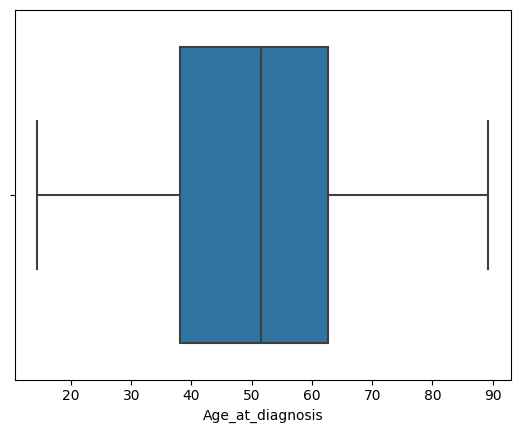

In [188]:
sns.boxplot(data=df, x='Age_at_diagnosis')

In [189]:
df['Age_at_diagnosis'].fillna(df['Age_at_diagnosis'].mean(), inplace=True)
df.describe()
# imputing missing age values w mean and not median bc boxplot shows no outliers TODO make another boxplot 

,Grade,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
count,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,...,840.00,840.00,840.00,840.00,840.00,840.00,8.40e+02,840.00,840.00,840.00
mean,0.42,50.87,0.48,0.41,0.26,0.17,0.13,0.13,0.12,0.09,...,0.03,0.03,0.03,0.03,0.03,0.03,1.19e-03,0.02,0.07,0.91
std,0.49,15.63,0.50,0.49,0.44,0.37,0.34,0.34,0.32,0.28,...,0.18,0.18,0.18,0.16,0.16,0.16,3.45e-02,0.13,0.26,0.28
min,0.00,14.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00
25%,0.00,38.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,1.00
50%,0.00,51.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,1.00
75%,1.00,62.62,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,1.00
max,1.00,89.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.00


# Visualization

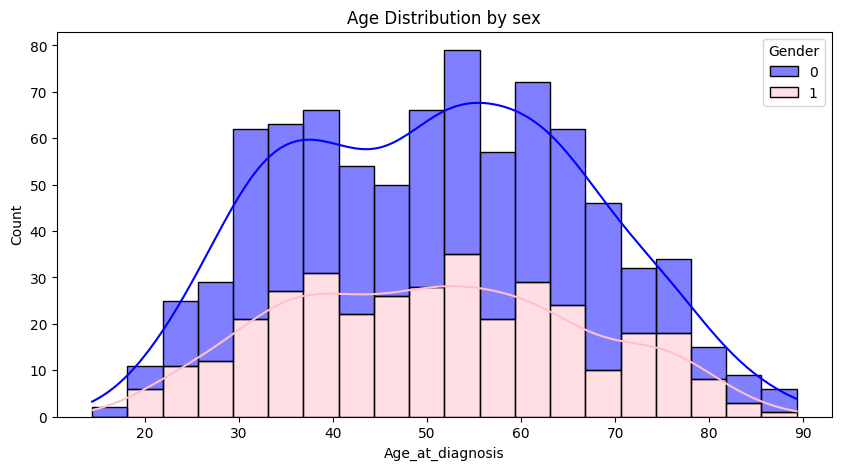

In [190]:
#checking age distribution 
plt.figure(figsize=(10, 5))
sns.histplot(x='Age_at_diagnosis', data=df, hue='Gender', palette={0: 'blue', 1: 'pink'}, multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by sex')
plt.show()

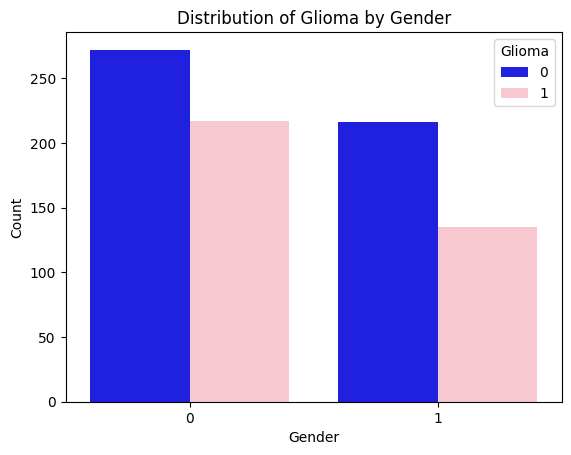

In [191]:
sns.countplot(data=df, x='Gender', hue='Grade', palette={0: 'blue', 1: 'pink'})

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Glioma by Gender')
plt.legend(title='Glioma')

plt.show()

In [192]:
df.iloc[:, 3 : 23].columns

Index(['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')

comment: Results: We identified mutations that affected amino acid 132 of IDH1 in more than 70% of WHO grade II and III astrocytomas and oligodendrogliomas and in glioblastomas that developed from these lower-grade lesions. Tumors without mutations in IDH1 often had mutations affecting the analogous amino acid (R172) of the IDH2 gene. Tumors with IDH1 or IDH2 mutations had distinctive genetic and clinical characteristics, and patients with such tumors had a better outcome than those with wild-type IDH genes. Each of four tested IDH1 and IDH2 mutations reduced the enzymatic activity of the encoded protein.

In [193]:
fig = make_subplots(rows=5, cols=4)

# Loop through columns 3 to 22 (indexing from 0 to 19)
column_names = []  # List to store column names for legend

for i, column in enumerate(df.iloc[:, 3:23].columns, start=1):
    row_num = (i - 1) // 4 + 1  # Calculate row number
    col_num = (i - 1) % 4 + 1   # Calculate column number

    value_counts = df[column].value_counts()

    fig.add_trace(
        go.Bar(x=value_counts.index, y=value_counts.values),
        row=row_num, col=col_num
    )
    
    column_names.append(f'Column {column}')  # Store column names for legend

    fig.update_xaxes(title_text=f'{column}', row=row_num, col=col_num)  # X-axis title

# Update layout for all subplots
fig.update_layout(title='Value Counts for Columns 3 to 22', width = 1000, height = 1200)
fig.for_each_trace(lambda trace: trace.update(name=column_names.pop(0)))  # Update trace names using stored column names
fig.show()

Explains why IDH1 mutations so prevalent (boxplot balanced). Also expect that correlation matrix will show inv corrs between idh1 and idh2

Other mutations imbalanced bc not all gliomas have all mutated genes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

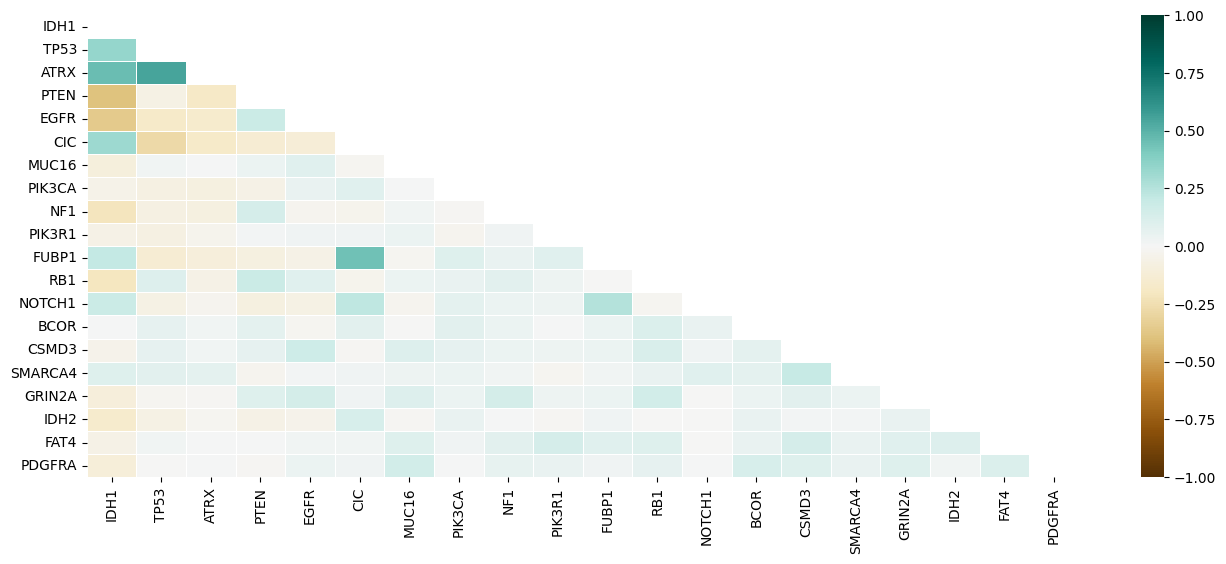

In [194]:
plt.figure(figsize=(16, 6))
corr = df.iloc[:, 3 : 23].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, fmt="d", linewidths=.5, cmap='BrBG')

We will explain that we had initially hypothesized to use PCA because of the high dimensionality of the dataset. 
However, upon inspecting feature correlations (which we DID NOT DO WELL) and determining that we cannot establish a complete lack of linear correlation (bc of MENTION CORRELATIONS AND PAPER BACKED UP EVIDENCE) between features, we decided not to perform feature scaling. 

Yes, PCA can be applied even if there are many binary columns in your dataset. PCA operates on the correlation structure of the data, and it can be applied regardless of the type of data (binary, categorical, numerical, etc.). However, whether it's effective or advisable to use PCA with binary data depends on the specific characteristics of your dataset and your objectives.

When applying PCA to binary data, it's essential to consider a few points:

### Sparsity and Interpretation:
- **Sparsity:** Binary data often leads to sparse matrices, which might affect the effectiveness of PCA.
- **Interpretation:** Interpretability might be reduced as the principal components become linear combinations of binary variables.

### Variance Explained:
- **Explained Variance:** With binary data, the variance might not be well captured by principal components compared to continuous variables.

### Dimensionality Reduction:
- **Reducing Dimensionality:** Despite the above challenges, PCA might still help in reducing dimensionality and might be beneficial if the binary variables are highly correlated.

### Alternative Methods:
- **Alternative Techniques:** For binary data, alternative dimensionality reduction techniques like factor analysis or non-linear methods might be more suitable.

### Sparse PCA:
- **Sparse PCA:** There's also Sparse PCA, which is designed to handle sparse data more effectively by encouraging sparsity in the loadings.

Before applying PCA to binary data, consider the trade-offs and whether it aligns with your objectives, especially in terms of interpretability, explained variance, and the underlying structure of your data. Additionally, try different techniques and assess their effectiveness based on your specific use case and dataset characteristics.